In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:
df = pd.read_csv('cleaned_titanic_data.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [12]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
((df['Survived'] == 0).value_counts())/len(df)

Survived
True     0.616162
False    0.383838
Name: count, dtype: float64

# Separate into independent and dependent

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [27]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = df['Survived']
X,y

(     Pclass        Age  SibSp  Parch     Fare  Gender
 0         3  22.000000      1      0   7.2500       1
 1         1  38.000000      1      0  71.2833       0
 2         3  26.000000      0      0   7.9250       0
 3         1  35.000000      1      0  53.1000       0
 4         3  35.000000      0      0   8.0500       1
 ..      ...        ...    ...    ...      ...     ...
 886       2  27.000000      0      0  13.0000       1
 887       1  19.000000      0      0  30.0000       0
 888       3  29.699118      1      2  23.4500       0
 889       1  26.000000      0      0  30.0000       1
 890       3  32.000000      0      0   7.7500       1
 
 [891 rows x 6 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

# Split into train and test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape,y_train.shape

((712, 6), (712,))

In [34]:
X_test.shape,y_test.shape

((179, 6), (179,))

# Model training and Prediction

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [41]:
X_train[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.5,0,0,28.500,1
733,2,23.0,0,0,13.000,1
382,3,32.0,0,0,7.925,1


In [43]:
y_train[:3]

331    0
733    0
382    0
Name: Survived, dtype: int64

In [45]:
y_pred_train[:3]

array([0, 0, 0], dtype=int64)

# Model evaluation

In [53]:
confusion_matrix(y_train,y_pred_train)

array([[389,  55],
       [ 87, 181]], dtype=int64)

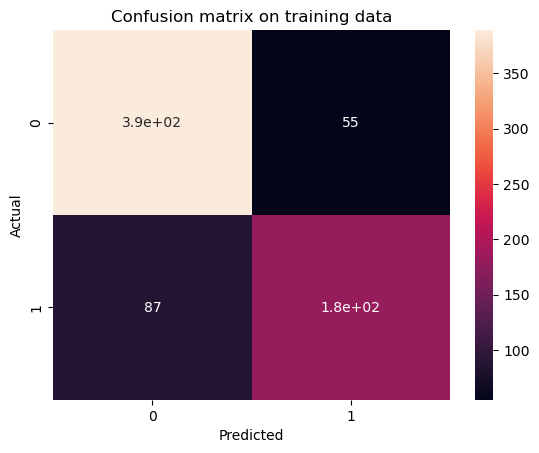

In [63]:
sb.heatmap(confusion_matrix(y_train,y_pred_train),annot = True)
plt.title('Confusion matrix on training data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [65]:
accuracy_score(y_train,y_pred_train)

0.800561797752809

In [67]:
accuracy_score(y_test,y_pred_test)

0.8100558659217877

In [71]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       444
           1       0.77      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712

